In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt

from modules.utils import load_cifar10
from modules.train import train
from modules.cnn_with_spectral_pooling import CNN_Spectral_Pool

% matplotlib inline
% load_ext autoreload
% autoreload 2

In [2]:
xtrain, ytrain, xtest, ytest = load_cifar10(1, get_test_data=True, channels_last=True)

getting batch 1


In [3]:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((10000, 32, 32, 3), (10000,), (10000, 32, 32, 3), (10000,))

In [54]:
# # take a small batch for testing architecture
sample_size = 32
sampleind = np.random.choice(np.arange(xtrain.shape[0]),
                             size=sample_size, replace=False)
xtrain_sample = xtrain[sampleind]
ytrain_sample = ytrain[sampleind]
assert len(np.unique(ytrain_sample)) == 10
xtrain_sample.shape

(32, 32, 32, 3)

## test build graph:

In [ ]:
cnn = CNN_Spectral_Pool(M=1,verbose=True,learning_rate=1e-3, l2_norm=0, lr_reduction_epochs=[1000], max_num_filters=2000)
tf.reset_default_graph()
cnn.train(xtrain_sample, ytrain_sample, xtrain_sample, ytrain_sample,
          batch_size=32, epochs=20)

Building tf graph...
Adding conv layer 1 | Input size: 32 | Input channels: 3 | #filters: 416 | filter size: 3
Adding spectral pool layer 1 | Input size: 32 | filter size: (27,27) | Freq Dropout: 32
number of batches for training: 1
training epoch 1 
32/32 loss: 2.384108543395996 | training accuracy: 6.250% | validation accuracy : 6.250%

	Best validation accuracy! iteration:1 accuracy: 6.25%

training epoch 2 


__Note:__ in the above output, train acc is not same as validation acc even though they are the same because of dropout applied in train and not in validation

In [8]:
cnn.calc_test_accuracy(xtrain_sample, ytrain_sample)

Building tf graph...
Adding conv layer 1 | Input size: 32 | Input channels: 3 | #filters: 128 | filter size: 3
Adding spectral pool layer 1 | Input size: 32 | filter size: (27,27) | Freq Dropout: 10
Adding conv layer 2 | Input size: 27 | Input channels: 128 | #filters: 160 | filter size: 3
Adding spectral pool layer 2 | Input size: 27 | filter size: (21,21) | Freq Dropout: 8
Adding conv layer 3 | Input size: 21 | Input channels: 160 | #filters: 192 | filter size: 3
Adding spectral pool layer 3 | Input size: 21 | filter size: (17,17) | Freq Dropout: 12
Adding conv layer 4 | Input size: 17 | Input channels: 192 | #filters: 192 | filter size: 1
Adding conv layer 5 | Input size: 17 | Input channels: 192 | #filters: 10 | filter size: 1
Adding final softmax layer using global averaging
Loading pre-trained model
INFO:tensorflow:Restoring parameters from model/test
Test accuracy: 18.750


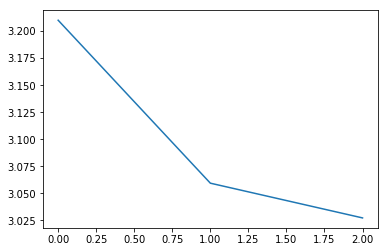

In [9]:
plt.plot(cnn.loss_vals)

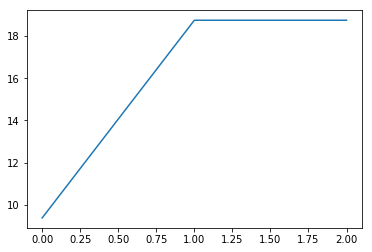

In [10]:
plt.plot(cnn.train_accuracy)

In [49]:
# show the graph
from modules.utils import show_graph 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('model/test.meta')
    graph = tf.get_default_graph()
    show_graph(graph)

In [18]:
c

2